# (Standard) Iris Example
To prevent to get too rusty in applying ML (and to get started with ML in python with libraries), a simple iris classification test. One uses a SVM, the other a simple feed foward neural network (using keras). 

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

%matplotlib inline

In [2]:
# Load dataset + Show overview
iris_dataset = load_iris()
pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Split up dataset
# random_state = seed
X_train, X_test, Y_train, Y_test = train_test_split(iris_dataset.data, iris_dataset.target, random_state=1)

print('Shape of X_train:{}\r\nShape of Y_train{}\r\nShape of X_train:{}\r\nShape of Y_train{}'.format(X_train.shape, Y_train.shape, X_train.shape, X_test.shape))

Shape of X_train:(112, 4)
Shape of Y_train(112,)
Shape of X_train:(112, 4)
Shape of Y_train(38, 4)


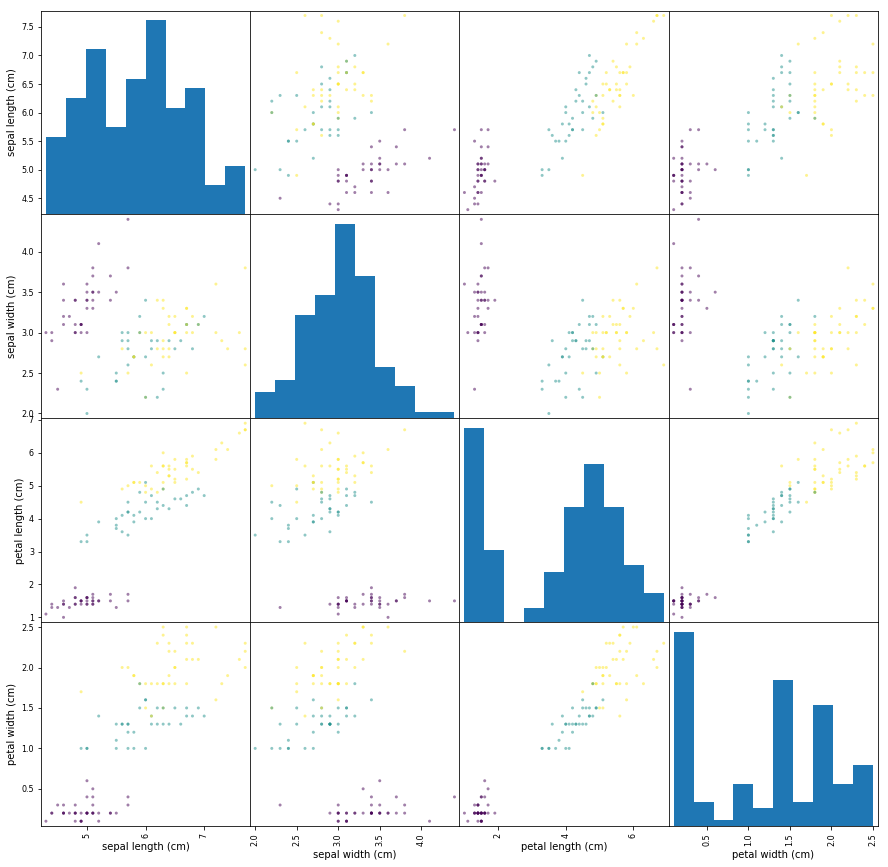

In [4]:
# Plot some train data
train_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
g = pd.plotting.scatter_matrix(train_df, c=Y_train, figsize=(15,15))

In [5]:
# First Classifier: SVM
from sklearn.svm import SVC
svmm = SVC() 
svmm.fit(X_train, Y_train)

# Print score
print('Train-Accuracy: {}'.format(svmm.score(X_train, Y_train)))
print('Test-Accuracy: {}'.format(svmm.score(X_test, Y_test)))

Train-Accuracy: 0.9821428571428571
Test-Accuracy: 0.9736842105263158


In [6]:
# Second Classifier: Simple Feed Forward Network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

model = Sequential()
model.add(Dense(3, activation='softmax', input_dim=4))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train, to_categorical(Y_train),
          epochs=20,
          batch_size=20)
print('Train-Loss:{}, Train-Accuracy: {}'.format(*model.evaluate(X_train, to_categorical(Y_train), batch_size=20)))
print('Train-Loss:{} Test-Accuracy: {}'.format(*model.evaluate(X_test, to_categorical(Y_test), batch_size=20)))

Using TensorFlow backend.


Epoch 1/20
112/112 [==============================] - 0s 3ms/step - loss: 3.5431 - acc: 0.5625
Epoch 2/20
112/112 [==============================] - 0s 107us/step - loss: 1.3388 - acc: 0.4018
Epoch 3/20
112/112 [==============================] - 0s 107us/step - loss: 0.8982 - acc: 0.5446
Epoch 4/20
112/112 [==============================] - 0s 98us/step - loss: 0.6369 - acc: 0.6964
Epoch 5/20
112/112 [==============================] - 0s 98us/step - loss: 0.5411 - acc: 0.7768
Epoch 6/20
112/112 [==============================] - 0s 98us/step - loss: 0.4834 - acc: 0.8661
Epoch 7/20
112/112 [==============================] - 0s 89us/step - loss: 0.4522 - acc: 0.7946
Epoch 8/20
112/112 [==============================] - 0s 98us/step - loss: 0.4331 - acc: 0.8571
Epoch 9/20
112/112 [==============================] - 0s 89us/step - loss: 0.4037 - acc: 0.8571
Epoch 10/20
112/112 [==============================] - 0s 98us/step - loss: 0.3952 - acc: 0.9196
Epoch 11/20
112/112 [=================